In [100]:
import pandas as pd
import matplotlib.pyplot as plt

- **Получаю файл к которому надо добавлять данные**

In [101]:
path_to_checks = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
path_to_active_studs = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
path_to_groups = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/UhyYx41rTt3clQ'

checks = pd.read_csv(path_to_checks, sep=";")
active_studs = pd.read_csv(path_to_active_studs)
groups = pd.read_csv(path_to_groups, sep=";")

df = active_studs.merge(groups, how = 'inner', left_on = 'student_id', right_on = 'id' )
# соеденяю таблицы active_studs и groups, inner - т.к. интересны студенты только с принадлежностью к группе

df.drop('id', axis= 1 , inplace= True )  # удаляю id т.к. дублирует student_id

df = df.merge(checks, how = 'left', on = 'student_id')
# присоеденяю таблицу checks, left - т.к. нужны все студенты: с оплатой и без

- **Создам функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.**

In [18]:
def add_new_file (df,link_to_new_file):

    url = 'https://getfile.dokpub.com/yandex/get/'

    path_to_groups_add = url + link_to_new_file # прямая ссылка работала пока не привысился лимит скачивания

    groups_add.columns = list(df)[:2]

    df_new = df.append(groups_add, ignore_index = True )

    df_new['payment'] = df_new.rev.apply(lambda x: 'pay' if x > 0 else 'not_pay').fillna(0)
    
    metrics = pd.DataFrame(columns=['cr', 'avg_chek', 'arpu', 'arppu'])
    
    metrics['cr'] = round(df_new.query('payment == "pay"').groupby('grp').agg({'rev':'count'}).rev \
       / df_new.groupby('grp').agg({'student_id':'count'}).student_id * 100, 2)

    metrics['avg_chek'] = round(df_new.query('payment == "pay"').groupby('grp').agg({'rev':'sum'}).rev \
       / df_new.query('payment == "pay"').groupby('grp').agg({'student_id':'count'}).student_id, 2)      

    metrics['arpu'] = round(df_new.groupby('grp').agg({'rev':'sum'}).rev \
       / df_new.groupby('grp').agg({'student_id':'count'}).student_id, 2)

    metrics['arppu'] = round(df_new.query('payment == "pay"').groupby('grp').agg({'rev':'sum'}).rev \
       / df_new.query('payment == "pay"').groupby('grp').agg({'rev':'count'}).rev, 2)
    return metrics

In [103]:
df_new = add_new_file(df)
df_new

,cr,avg_chek,arpu,arppu
A,5.01,933.59,46.77,933.59
B,4.56,1255.83,57.27,1255.83


- **Содам функцию, которая будет строить графики по получаемым метрикам.**

In [104]:
def graphs_metrics (df):

    plt.figure(figsize=(3, 3))
    df['cr'].plot(kind='bar', color=["green", "orange"])
    plt.title('Conversion rate', pad=10)
    plt.xlabel('Group', labelpad=5)
    plt.ylabel('CR', labelpad=5)
    plt.show()
    
    plt.figure(figsize=(3, 3))
    df['avg_chek'].plot(kind='bar', color=["green", "orange"])
    plt.title('Average check', pad=10)
    plt.xlabel('Group', labelpad=5)
    plt.ylabel('avg chek', labelpad=5)
    plt.show()
    
    plt.figure(figsize=(3, 3))
    df['arpu'].plot(kind='bar', color=["green", "orange"])
    plt.title('ARPU', pad=10)
    plt.xlabel('Group', labelpad=5)
    plt.ylabel('ARPU', labelpad=5)
    plt.show()
    
    plt.figure(figsize=(3, 3))
    df['arppu'].plot(kind='bar', color=["green", "orange"])
    plt.title('ARPPU', pad=10)
    plt.xlabel('Group', labelpad=5)
    plt.ylabel('ARPPU', labelpad=5)
    plt.show()

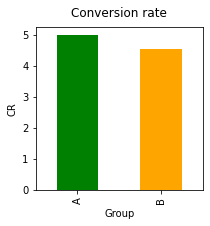

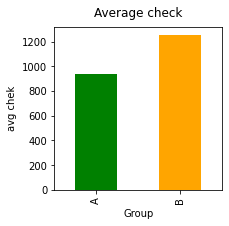

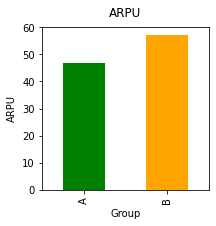

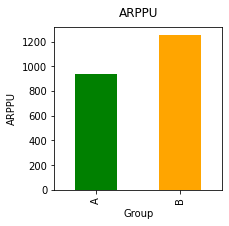

In [105]:
graphs_metrics(df_new)